# Position data

In [1]:
import datetime
import pickle

import matplotlib.pyplot as plt
import numpy as np

WIDTH = 70


def compute_mean_std(inp):
    mean = inp.mean(axis=1)
    std = inp.std(axis=1)
    return mean, std


def preprocess(x, y):
    position = np.vstack((x, y))
    mean, std = compute_mean_std(position)
    print(f"mean:{mean}, std:{std}")
    position = (position.T - mean) / std
    return position


def compute_l2_norm(x, y):
    dist = list()
    points = list(zip(x, y))
    for p in range(len(points) - 1):
        dist.append(np.linalg.norm(np.array(points[p]) - np.array(points[p + 1])))
    return sum(dist)


with open("brands-hatch-indy.pickle", "rb") as f:
    data = pickle.load(f)  # noqa: S301

x = [x[0] for x in data[1]]
y = [-x[1] for x in data[1]]  # remove minus sign for pygame.draw.line() in minimap.py

distance = compute_l2_norm(x, y)
print(f"distance driven:\t{distance * 1e-3:.4f} km")

laptime = str(datetime.timedelta(seconds=len(x) * 1 / 60))
print(f"lap time:\t\t{laptime}")

distance driven:	1.8914 km
lap time:		0:01:04.100000


$$
[
\begin{array}{*{3}{c}}x & z & 1
\end{array}
]
\rightarrow
[
\begin{array}{*{2}{c}}\frac{x -\mu(x)}{\sigma(x)} & \frac{z -\mu(z)}{\sigma(z)}
\end{array}
]
$$
$$
M =
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
\frac{-\mu(x)}{\sigma(x)} & \frac{-\mu(z)}{\sigma(z)}\\
\end{bmatrix}
$$

In [2]:
position = preprocess(x, y)
position *= WIDTH

x = position[:, 0]
y = position[:, 1]

mean:[-98.43143378 269.27969512], std:[196.47067901 113.8373942 ]


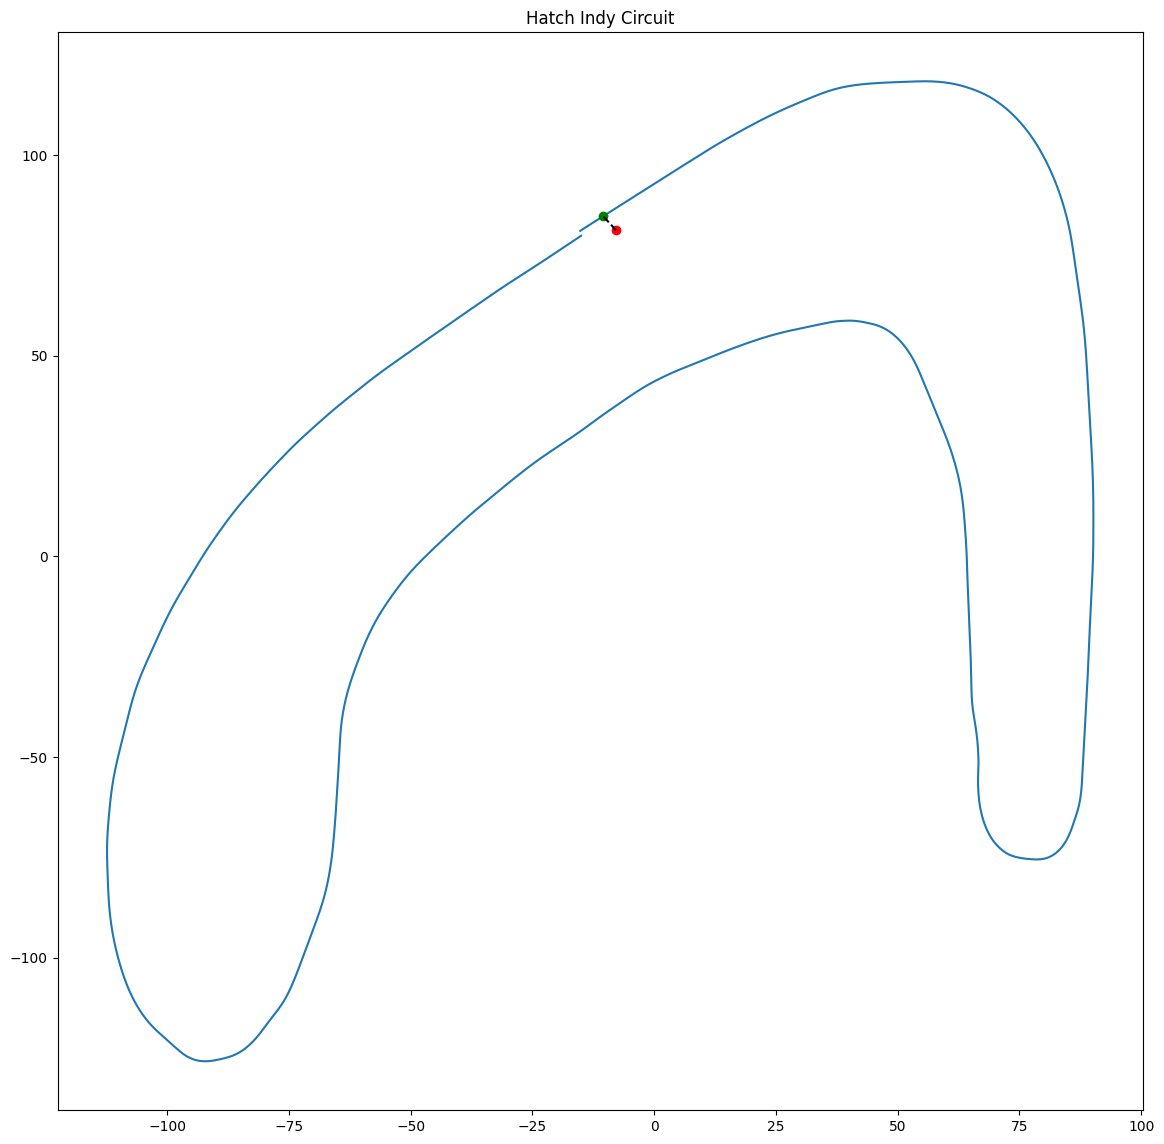

In [3]:
from shapely.geometry import LineString, Point
from shapely.ops import nearest_points

circuit = LineString(list(zip(x, y)))
position = Point(x[8] + 6, y[8] - 1)
nearest = nearest_points(circuit, position)[0]

fig, ax = plt.subplots(figsize=(14, 14))
ax.plot(x, y)
ax.plot(position.x, position.y, "ro")
ax.plot(nearest.x, nearest.y, "go")
ax.plot((position.x, nearest.x), (position.y, nearest.y), "k--")
plt.title("Hatch Indy Circuit")
plt.show()